In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
violations = gpd.read_file('../data/Property_Standards_Violations.csv')
print(violations.crs)
violations.head( )

None


,Request #,Date Received,Property APN,Property Address,City,State,ZIP,Property Owner,Complaint Source,Reported Problem,Status,Council District,Last Activity Date,Last Activity,Last Activity Result,Violations Noted,Mapped Location,geometry
0,21-1282201,12/03/2021,08302029400,304 CHAPEL AVE,NASHVILLE,TN,37206,MDHA,INSPECTOR REPORTED,VROW,DONE,6,12/14/2021,Violation Inspection CAR - PS,Violation Resolved,VEHICLE IN THE RIGHT OF WAY,"304 CHAPEL AVE\nNASHVILLE, TN 37206\n(36.18681...",None
1,21-1277394,10/05/2021,06100004700,2701 OAKWOOD AVE,NASHVILLE,TN,37207,METRO GOV'T P OAKWOOD,INSPECTOR REPORTED,AMV,DONE,8,12/14/2021,Vehicle ROW Final - PS,Violation Resolved,,"2701 OAKWOOD AVE\nNASHVILLE, TN 37207\n(36.213...",None
2,21-1283105,12/14/2021,07104014700,0 KINGSTON ST,NASHVILLE,TN,37207,"MCMURTRY, JAMES E.",Audit,NVF,DONE,5,12/14/2021,Initial Audit Inspection - PS,PS - No Violation Found - Audit,,"0 KINGSTON ST\nNASHVILLE, TN 37207",None
3,22-1303082,07/19/2022,08307037500,0 EASTLAND AVE,NASHVILLE,TN,37206,"T & M DEVELOPMENT, LLC",PHONE,HIGH GRASS,DONE,6,07/20/2022,PS - Close Out Reason,DONE,,"0 EASTLAND AVE\nNASHVILLE, TN 37206",None
4,21-1266273,06/09/2021,08209049800,1515 5TH AVE N,NASHVILLE,TN,37208,"SWHR GERMANTOWN RESIDENTIAL, LLC",HUB,Type: Public Safety - Abandoned Vehicles\n\nDe...,DONE,19,06/10/2021,PS - Close Out Reason,DONE,,"1515 5TH AVE N\nNASHVILLE, TN 37208\n(36.17946...",None


In [3]:
violations_map = gpd.read_file('../data/Property_Standards_Violations_Map.csv')
print(violations_map.crs)
violations_map.head( )

None


,Request #,Date Received,Property APN,Property Address,City,State,ZIP,Property Owner,Complaint Source,Reported Problem,Status,Council District,Last Activity Date,Last Activity,Last Activity Result,Violations Noted,Mapped Location,geometry
0,21-1282201,12/03/2021,08302029400,304 CHAPEL AVE,NASHVILLE,TN,37206,MDHA,INSPECTOR REPORTED,VROW,DONE,6,12/14/2021,Violation Inspection CAR - PS,Violation Resolved,VEHICLE IN THE RIGHT OF WAY,"304 CHAPEL AVE\nNASHVILLE, TN 37206\n(36.18681...",None
1,21-1277394,10/05/2021,06100004700,2701 OAKWOOD AVE,NASHVILLE,TN,37207,METRO GOV'T P OAKWOOD,INSPECTOR REPORTED,AMV,DONE,8,12/14/2021,Vehicle ROW Final - PS,Violation Resolved,,"2701 OAKWOOD AVE\nNASHVILLE, TN 37207\n(36.213...",None
2,21-1283105,12/14/2021,07104014700,0 KINGSTON ST,NASHVILLE,TN,37207,"MCMURTRY, JAMES E.",Audit,NVF,DONE,5,12/14/2021,Initial Audit Inspection - PS,PS - No Violation Found - Audit,,"0 KINGSTON ST\nNASHVILLE, TN 37207",None
3,22-1303082,07/19/2022,08307037500,0 EASTLAND AVE,NASHVILLE,TN,37206,"T & M DEVELOPMENT, LLC",PHONE,HIGH GRASS,DONE,6,07/20/2022,PS - Close Out Reason,DONE,,"0 EASTLAND AVE\nNASHVILLE, TN 37206",None
4,21-1266273,06/09/2021,08209049800,1515 5TH AVE N,NASHVILLE,TN,37208,"SWHR GERMANTOWN RESIDENTIAL, LLC",HUB,Type: Public Safety - Abandoned Vehicles\n\nDe...,DONE,19,06/10/2021,PS - Close Out Reason,DONE,,"1515 5TH AVE N\nNASHVILLE, TN 37208\n(36.17946...",None


In [7]:
violations_filter = gpd.read_file('../data/Property_Standards_Violations_Filtered.csv')
print(violations_filter.crs)
violations_filter.head( )

None


,Request #,Date Received,Property APN,Property Address,City,State,ZIP,Property Owner,Complaint Source,Reported Problem,Status,Council District,Last Activity Date,Last Activity,Last Activity Result,Violations Noted,Mapped Location,geometry
0,22-1284506,01/03/2022,12001008100,1215 KERMIT DR,NASHVILLE,TN,37217,"FIELDS, ROBERT B., JR. & SAMUEL PAUL",PHONE,damaged chain link fence,DONE,13,02/18/2022,Violation Inspection - PS,Violation Resolved,EXTERIOR PROP AREA � ACCES STRUCTURES,"1215 KERMIT DR\nNASHVILLE, TN 37217\n(36.12499...",None
1,22-1284455,01/03/2022,14704016900,302 WALLACE RD,NASHVILLE,TN,37211,"HOLLY HILLS TN., L.P.",HUB,PROBLEM REPORTED,DONE,30,07/20/2022,Violation Inspection - PS,Violation Resolved,"EXTERIOR OF BLDGS � ROOFS � ROOF SYSTEM,INTERI...","302 WALLACE RD\nNASHVILLE, TN 37211\n(36.07947...",None
2,22-1284527,01/03/2022,08304028900,2112 ROSECLIFF DR,NASHVILLE,TN,37206,"PARDUE, RASHEEDAH",HUB,Type: Public Safety - Abandoned Vehicles\n\nDe...,DONE,7,04/14/2022,Env Court 1st Setting - PS,PS - Resolved without Legal Action,"OPEN STORAGE, JUNK, TRASH, DEBRIS,UNLIC / INOP...","2112 ROSECLIFF DR\nNASHVILLE, TN 37206\n(36.19...",None
3,22-1284522,01/03/2022,09207032500,821 FISK ST,NASHVILLE,TN,37203,"PRIME NASHVILLE, LLC",INSPECTOR REPORTED,,DONE,19,09/06/2022,Violation Inspection - PS,Violation Resolved,"OPEN STORAGE, JUNK, TRASH, DEBRIS,PARKING ON G...","821 FISK ST\nNASHVILLE, TN 37203\n(36.160635, ...",None
4,22-1284393,01/03/2022,08302027201,2013 GREENWOOD AVE,NASHVILLE,TN,37206,"WHITLOW, ELEAN L. & FANNIE B.",INSPECTOR REPORTED,"JTD, IMV",DONE,6,02/23/2022,Violation Inspection - PS,Violation Resolved,"EXTERIOR PROP AREA � OPEN STORAGE - ALL,UNLIC ...","2013 GREENWOOD AVE\nNASHVILLE, TN 37206\n(36.1...",None


In [8]:
violations_filter.loc[0, 'Mapped Location']

'1215 KERMIT DR\nNASHVILLE, TN 37217\n(36.124992, -86.701847)'

In [12]:
sidewalks = gpd.read_file('../data/sidewalk_inventory.geojson')
print(sidewalks.crs)
sidewalks.head( )

epsg:4326


,evnt_lat,obj_pot,side,measure,curbtype,evnt_lon,sw_mat_ty,drv_ld,cr_slp,event_subt,...,drv_ti_mat,from,obj_hgt,cr_slp_d,routeid,drv_cs,obj_type,onst,tost,geometry
0,36.08965518,None,S,892,None,-86.62350564,None,0,None,None,...,None,Bell Rd,None,None,8600,None,None,Smith Springs Rd,Rural Hill Rd,POINT (-86.62351 36.08966)
1,36.16262,None,W,390.4704334,None,-86.81184584,None,0,0,FLUSH,...,None,Morena St,None,None,93,0,BIKE FRIENDLY,24th Ave N,Herman St,POINT (-86.81185 36.16262)
2,36.16528346,None,N,161,None,-86.81559108,None,0,None,POINT,...,None,26th Ave N,None,None,26,None,HC-L,Albion St,25th Ave N,POINT (-86.81559 36.16528)
3,36.16549622,None,S,425,None,-86.81060602,None,-1,None,None,...,GRAVEL,24th Ave N,None,None,36,7.4,RESDRW-MID,Albion St,21st Ave N,POINT (-86.81061 36.16550)
4,36.16658087,"LESS THAN 32""",N,218,None,-86.81150264,None,0,None,None,...,None,24th Ave N,None,None,4,None,VEGPT,Alameda St,21st Ave N,POINT (-86.81150 36.16658)


In [13]:
type(sidewalks)

geopandas.geodataframe.GeoDataFrame

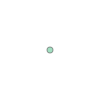

In [14]:
sidewalks.loc[0, 'geometry']

<AxesSubplot:>

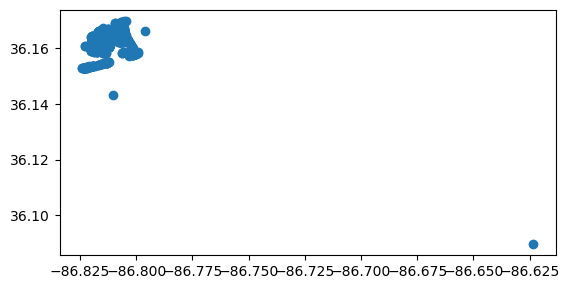

In [15]:
sidewalks.plot()

In [16]:
rightway = gpd.read_file('../data/right_of_way_permits.geojson')
print(rightway.crs)
rightway.head( )

epsg:4326


,on_street,conditions_traffic_control,city,latitude,zip,scope,location_address,permit_applicant_name,longitude,company,...,permit,status,permit_description,from_street,permit_type,initiated_date,to_street,council_district,days_to_work,geometry
0,120 2ND AVE N,None,NASHVILLE,36.1633636862064,37201,SIDEWALK CAFE PERMIT,120 2ND AVE N,NICHOLAS GALIANO,-86.7761406643161,Wild Horse Saloon,...,202218293,ACTIVE,SIDEWALK CAFE PERMIT,BROADWAY,SIDEWALK CAFE ANNUAL PERMIT,2022-05-20T10:25:22,COMMERCE,19,Monday Tuesday Wednesday Thursday Friday Satur...,POINT (-86.77614 36.16336)
1,212 WILOWEN DR,lane closed maintain two-way traffic Daylight...,NASHVILLE,36.1640826091525,37210,DITCH EXCAVATION,212 WILOWEN DR,MICKEY JACKSON,-86.7086241173481,METRO WATER,...,202224257,ACTIVE,DITCH EXCAVATION,LISA LN,EXCAVATION PERMIT,2022-07-05T14:10:41,DAHLIA DR,15,Monday Tuesday Wednesday Thursday Friday Satur...,POINT (-86.70862 36.16408)
2,APPLE BLOSSOM CT,None,ANTIOCH,36.0058730886293,37013,NEW DRIVEWAY,APPLE BLOSSOM CT,RAFI HAUTER,-86.6316071986351,Rafi Hauter,...,202225567,ACTIVE,NEW DRIVEWAY,SMOKEY HILL RD,DRIVEWAY PERMIT,2022-07-13T10:59:24,CUL-DE-SAC,33,Monday Tuesday Wednesday Thursday Friday Satur...,POINT (-86.63161 36.00587)
3,DEADERICK ST,Parking of mobile food truck in any of the aut...,NASHVILLE,36.1662405591285,37201,MOBILE FOOD TRUCK,DEADERICK ST,JOSEPH SANTIAGO,-86.779409317216,Uncle Louie G Nashville,...,202229809,ACTIVE,MOBILE FOOD TRUCK,2ND AV N,LANE CLOSURE,2022-08-11T11:52:38,4TH AV N,19,Monday Tuesday Wednesday Thursday Friday Satur...,POINT (-86.77941 36.16624)
4,1409 12TH AVE S,Text the inspector a picture and the permit nu...,NASHVILLE,36.1394275022758,37203,"EXCAVATION AND POURING OF A CONCRETE PAD, BIKE...",1409 12TH AVE S,ERIC MAGAS,-86.7876527043792,Nashville B-Cycle,...,202230486,ACTIVE,"EXCAVATION AND POURING OF A CONCRETE PAD, BIKE...",HORTON AVE,LANE CLOSURE,2022-08-17T09:47:36,658 ALY,17,Monday Tuesday Wednesday Thursday Friday Satur...,POINT (-86.78765 36.13943)


In [17]:
type(rightway)

geopandas.geodataframe.GeoDataFrame

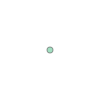

In [18]:
rightway.loc[0, 'geometry']

<AxesSubplot:>

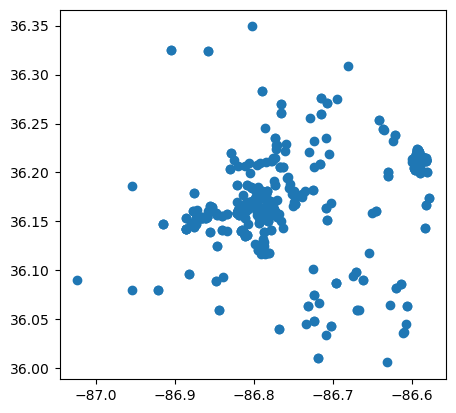

In [19]:
rightway.plot()

In [20]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [28]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]
rightway_zips = gpd.sjoin(rightway, zipcodes, op = 'within')

In [24]:
rightway_zips.head()

,on_street,conditions_traffic_control,city,latitude,zip_left,scope,location_address,permit_applicant_name,longitude,company,...,from_street,permit_type,initiated_date,to_street,council_district,days_to_work,geometry,index_right,zip_right,po_name
0,120 2ND AVE N,None,NASHVILLE,36.1633636862064,37201,SIDEWALK CAFE PERMIT,120 2ND AVE N,NICHOLAS GALIANO,-86.7761406643161,Wild Horse Saloon,...,BROADWAY,SIDEWALK CAFE ANNUAL PERMIT,2022-05-20T10:25:22,COMMERCE,19,Monday Tuesday Wednesday Thursday Friday Satur...,POINT (-86.77614 36.16336),36,37201,NASHVILLE
3,DEADERICK ST,Parking of mobile food truck in any of the aut...,NASHVILLE,36.1662405591285,37201,MOBILE FOOD TRUCK,DEADERICK ST,JOSEPH SANTIAGO,-86.779409317216,Uncle Louie G Nashville,...,2ND AV N,LANE CLOSURE,2022-08-11T11:52:38,4TH AV N,19,Monday Tuesday Wednesday Thursday Friday Satur...,POINT (-86.77941 36.16624),36,37201,NASHVILLE
6,2ND AVE N,"Follow MUTCD, Police Visible and Directing tra...",NASHVILLE,36.1620903918233,37201,BELL,2ND AVE N,SEAN MCCARTY,-86.7753360019195,Bell Construction,...,BROADWAY,LANE CLOSURE,2022-09-28T10:11:08,COMMERCE ST,19,Monday Tuesday Wednesday Thursday Friday Satur...,POINT (-86.77534 36.16209),36,37201,NASHVILLE
8,600 2ND AVE N,Text the inspector a picture and the permit nu...,NASHVILLE,36.1707397927459,37201,NES VAULT,600 2ND AVE N,MATTHEW PERNELL,-86.7806095798151,Pernell Excavating,...,JO JOHNSTON AVE,SIDEWALK PERMIT,2022-10-04T17:21:46,28 ALY,19,Monday Tuesday Wednesday Thursday Friday Satur...,POINT (-86.78061 36.17074),36,37201,NASHVILLE
41,201 BROADWAY,Text the inspector a picture and the permit nu...,NASHVILLE,36.1617958871696,37201,DRIVEWAY TO ALLOW ACCESS FOR TROLLEY PULL THRO...,201 BROADWAY,STEVE BURRESS,-86.7752930855971,OLD TOWN TROLLEY TOURS OF NASHVILLE,...,2ND AVE S,DRIVEWAY PERMIT,2022-09-27T14:49:01,15 ALY,19,Monday Tuesday Wednesday Thursday Friday Satur...,POINT (-86.77529 36.16180),36,37201,NASHVILLE


<AxesSubplot:>

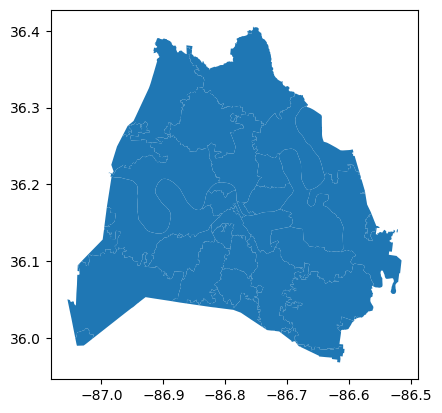

In [26]:
zipcodes.plot()

In [29]:
rightway_zips['zip_left'].value_counts()

37208    96
37076    88
37209    79
37203    49
37201    38
37207    31
37212    24
37206    19
37138    16
37211    16
37013    13
37219    13
37218    10
37115     9
37210     8
37214     7
37217     7
37204     6
37216     5
37215     5
37080     4
37221     4
37205     4
37027     2
37189     1
37228     1
37213     1
37072     1
Name: zip_left, dtype: int64

In [37]:
rightway_37208 = rightway_zips.loc[rightway_zips['zip_left'] == '37208']
rightway_37208.shape

(96, 25)

In [39]:
polygon37208 = zipcodes.loc[zipcodes['zip'] == '37208']
polygon37208.shape

(1, 3)

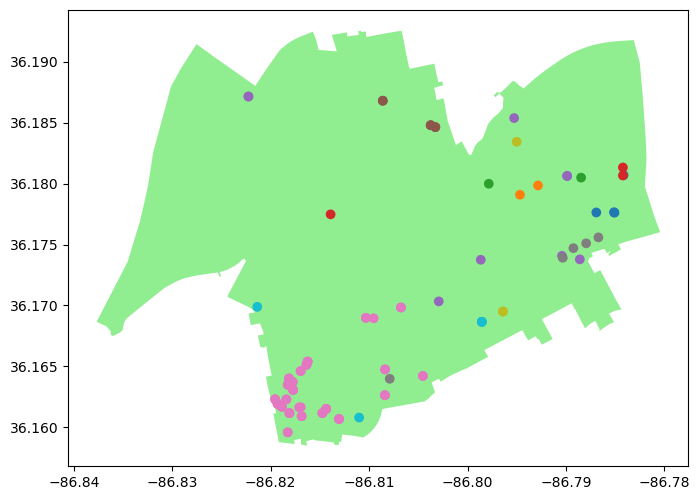

In [40]:
ax = polygon37208.plot(figsize = (8, 10), color = 'lightgreen')
rightway_37208.plot( ax = ax, column = 'permit_description')
plt.show();

In [41]:
polygon37208.geometry.centroid

/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_8138/3949564998.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37208.geometry.centroid


40    POINT (-86.80805 36.17736)
dtype: geometry

In [42]:
center = polygon37208.geometry.centroid[40]
print(center)

POINT (-86.80805166127745 36.17736306493883)


/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_8138/3614698512.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37208.geometry.centroid[40]


In [43]:
area_center = [center.y, center.x]
print(area_center)

[36.17736306493883, -86.80805166127745]


In [44]:
map_37208 = folium.Map(location = area_center, zoom_start = 12)
map_37208

In [45]:
rightway_37208.head()

,on_street,conditions_traffic_control,city,latitude,zip_left,scope,location_address,permit_applicant_name,longitude,company,...,from_street,permit_type,initiated_date,to_street,council_district,days_to_work,geometry,index_right,zip_right,po_name
5,4TH AVE N,"Follow MUTCD, Police Visible and Directing tra...",NASHVILLE,36.1755845221858,37208,NASHVILLE OKTOBERFEST 2022,4TH AVE N,MICHAEL KING,-86.7867085628287,Nashville Oktoberfest,...,JR GILLIAM WAY,STREET CLOSURE,2022-09-16T13:56:07,MADISON ST,19,Monday Tuesday Wednesday Thursday Friday Satur...,POINT (-86.78671 36.17558),40,37208,NASHVILLE
15,5TH AVE N,None,NASHVILLE,36.185370210116,37208,FILMING JILLS VERANDA (JILLS PORCH),5TH AVE N,JUDIT VERGA,-86.7952701699499,Warner Bros,...,JEFFERSON ST,SIDEWALK PERMIT,2022-10-05T15:14:55,COFFEE ST,19,Monday Tuesday Wednesday Thursday Friday Satur...,POINT (-86.79527 36.18537),40,37208,NASHVILLE
17,2737 HERMAN ST,Text the inspector a picture and the permit nu...,NASHVILLE,36.1616919430922,37208,GOOGLE WORK - SUBCONTRACTOR: B&B,2737 HERMAN ST,JONATHAN ROPER,-86.8188736043087,Ervin Cable Construction,...,27TH AVE N,SIDEWALK PERMIT,2022-09-29T09:21:33,28TH AVE N,21,Monday Tuesday Wednesday Thursday Friday Satur...,POINT (-86.81887 36.16169),40,37208,NASHVILLE
26,7TH AVE N,None,NASHVILLE,36.174068930624,37208,FILMING JILLS VERANDA (JILLS PORCH),7TH AVE N,JUDIT VERGA,-86.7904100110462,Warner Bros,...,TAYLOR ST,SIDEWALK PERMIT,2022-10-05T15:32:16,MADISON ST,19,Monday Tuesday Wednesday Thursday Friday Satur...,POINT (-86.79041 36.17407),40,37208,NASHVILLE
33,28TH AVE N,Text the inspector a picture and the permit nu...,NASHVILLE,36.1619344797832,37208,GOOGLE WORK - SUBCONTRACTOR: B&B,28TH AVE N,JONATHAN ROPER,-86.819302757536,Ervin Cable Construction,...,944 ALY,SIDEWALK PERMIT,2022-09-29T08:50:22,944 ALY,21,Monday Tuesday Wednesday Thursday Friday Satur...,POINT (-86.81930 36.16193),40,37208,NASHVILLE


In [50]:
map_37208 = folium.Map(location = area_center, zoom_start = 12)

folium.GeoJson(polygon37208).add_to(map_37208)

for row_index, row_values in rightway_37208.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['permit_description'])
    icon = folium.Icon(color = 'blue', icon = 'hand-o-right', prefix = 'fa')
    
    marker = folium.Marker(location = loc, popup = pop, icon = icon)
    
    marker.add_to(map_37208)
map_37208.save('../maps/map_37208.html')

map_37208

In [48]:
folium.Map?

In [52]:
cluster_map_37208 = folium.Map(location = area_center, zoom_start = 12)

marker_cluster = MarkerCluster().add_to(cluster_map_37208)

folium.GeoJson(polygon37208).add_to(cluster_map_37208)

for row_index, row_values in rightway_37208.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['permit_description'])
    icon = folium.Icon(color = 'green', icon = 'spinner', prefix = 'fa')
    
    marker = folium.Marker(location = loc, popup = pop, icon = icon)
    marker.add_to(marker_cluster)
    
cluster_map_37208.save('../maps/cluster_map_37208.html')

cluster_map_37208

In [53]:
map_37208 = folium.Map(location = area_center, zoom_start = 12)

folium.GeoJson(polygon37208).add_to(map_37208)

locations = rightway_37208[['latitude', 'longitude']].values.tolist()
map_37208.add_child(FastMarkerCluster(locations))

map_37208

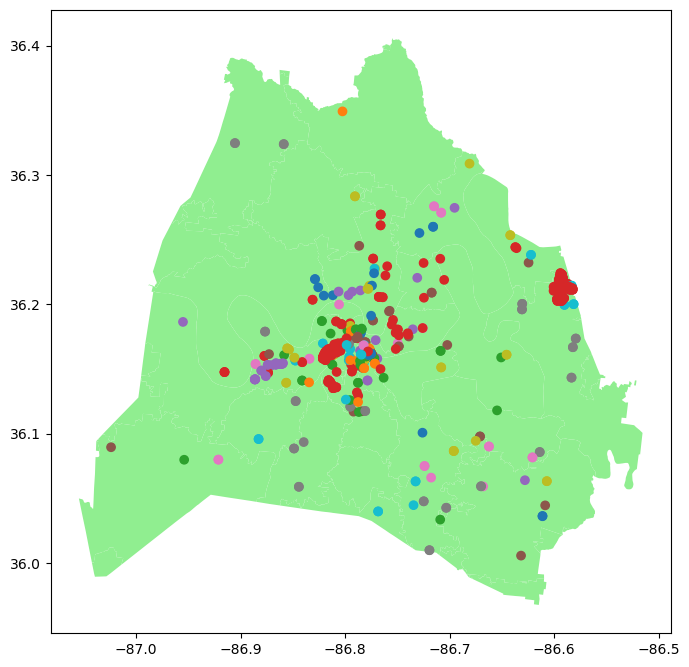

In [33]:
ax = zipcodes.plot(figsize = (8, 10), color = 'lightgreen')
rightway.plot( ax = ax, column = 'permit_description')
plt.show();

In [54]:
zipcodes.geometry.centroid

/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_8138/3801680343.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zipcodes.geometry.centroid


0     POINT (-86.69477 36.25433)
1     POINT (-86.72635 36.21605)
2     POINT (-86.77467 36.10566)
3     POINT (-86.78551 36.04148)
4     POINT (-87.02866 36.00026)
5     POINT (-87.03712 36.08997)
6     POINT (-86.86263 36.38001)
7     POINT (-86.97531 36.06283)
8     POINT (-86.76433 36.33621)
9     POINT (-86.80157 36.13335)
10    POINT (-86.63653 35.98113)
11    POINT (-86.72226 36.00938)
12    POINT (-86.91816 36.15605)
13    POINT (-86.73098 36.18090)
14    POINT (-86.69470 36.00387)
15    POINT (-86.85733 36.37882)
16    POINT (-86.72570 36.00942)
17    POINT (-86.66093 36.10779)
18    POINT (-86.82996 36.27880)
19    POINT (-86.78726 36.28724)
20    POINT (-86.89487 36.32034)
21    POINT (-86.68513 35.99434)
22    POINT (-86.64118 36.25192)
23    POINT (-86.98674 36.15655)
24    POINT (-86.78317 36.16682)
25    POINT (-86.68331 35.99201)
26    POINT (-86.76289 36.39920)
27    POINT (-86.89039 36.20505)
28    POINT (-86.52221 36.13926)
29    POINT (-86.67866 35.98840)
30    POIN